In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
# from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [16]:
df = pd.read_csv("./data/Tourism_pre.CSV")

# Gender변수 가변수 처리
df1 = pd.get_dummies(df, columns = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation'], drop_first=True)

# 데이터 정규화 적용
mm_scaler = MinMaxScaler()
minmax = mm_scaler.fit_transform(df1)
df_minmax = pd.DataFrame(data=minmax, columns=df1.columns)

In [15]:
df_minmax.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_2,ProductPitched_3,ProductPitched_4,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,Designation_1,Designation_2,Designation_3,Designation_4
0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,0,1,0,0,1,0,0
1,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
2,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,0,1,0,1,0,0,0
3,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,0,0,1,0,0,0
4,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,0,0,0,0,0,1,0,0,0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

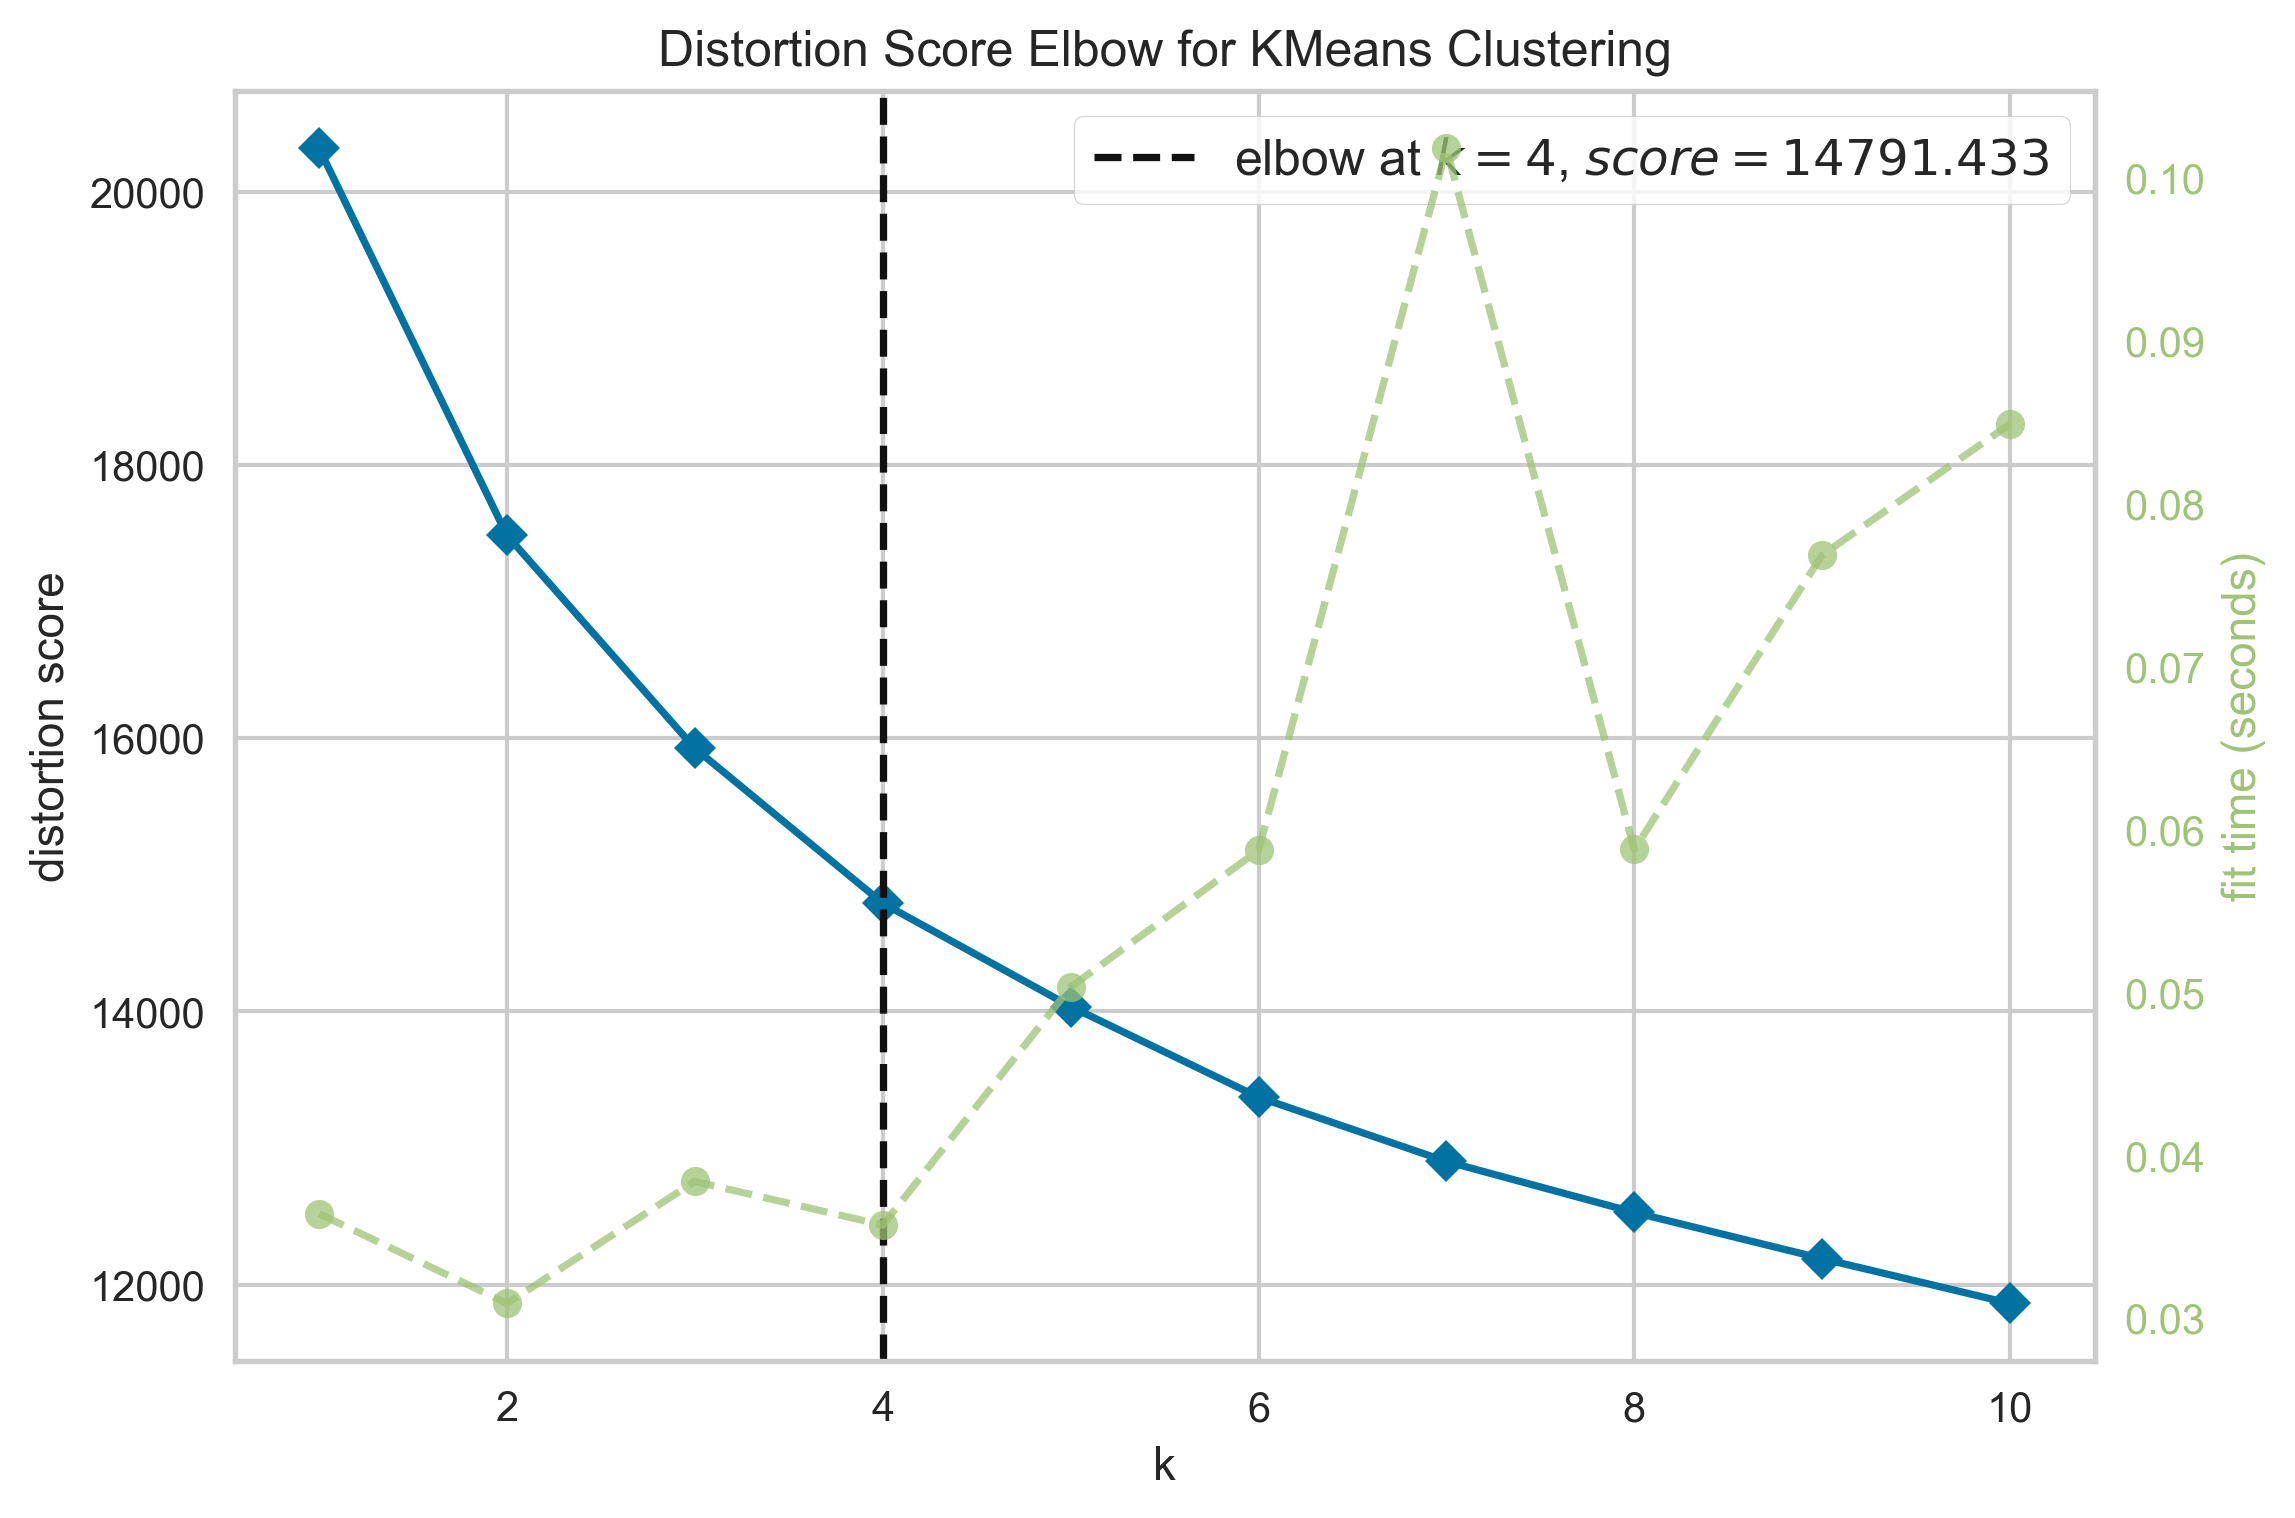

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

Elbow_Chart = KElbowVisualizer(model, k=(1,11))
Elbow_Chart.fit(df_minmax)
Elbow_Chart.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


실루엣 스코어(1에 근접해야 좋음): 0.1500711648129037


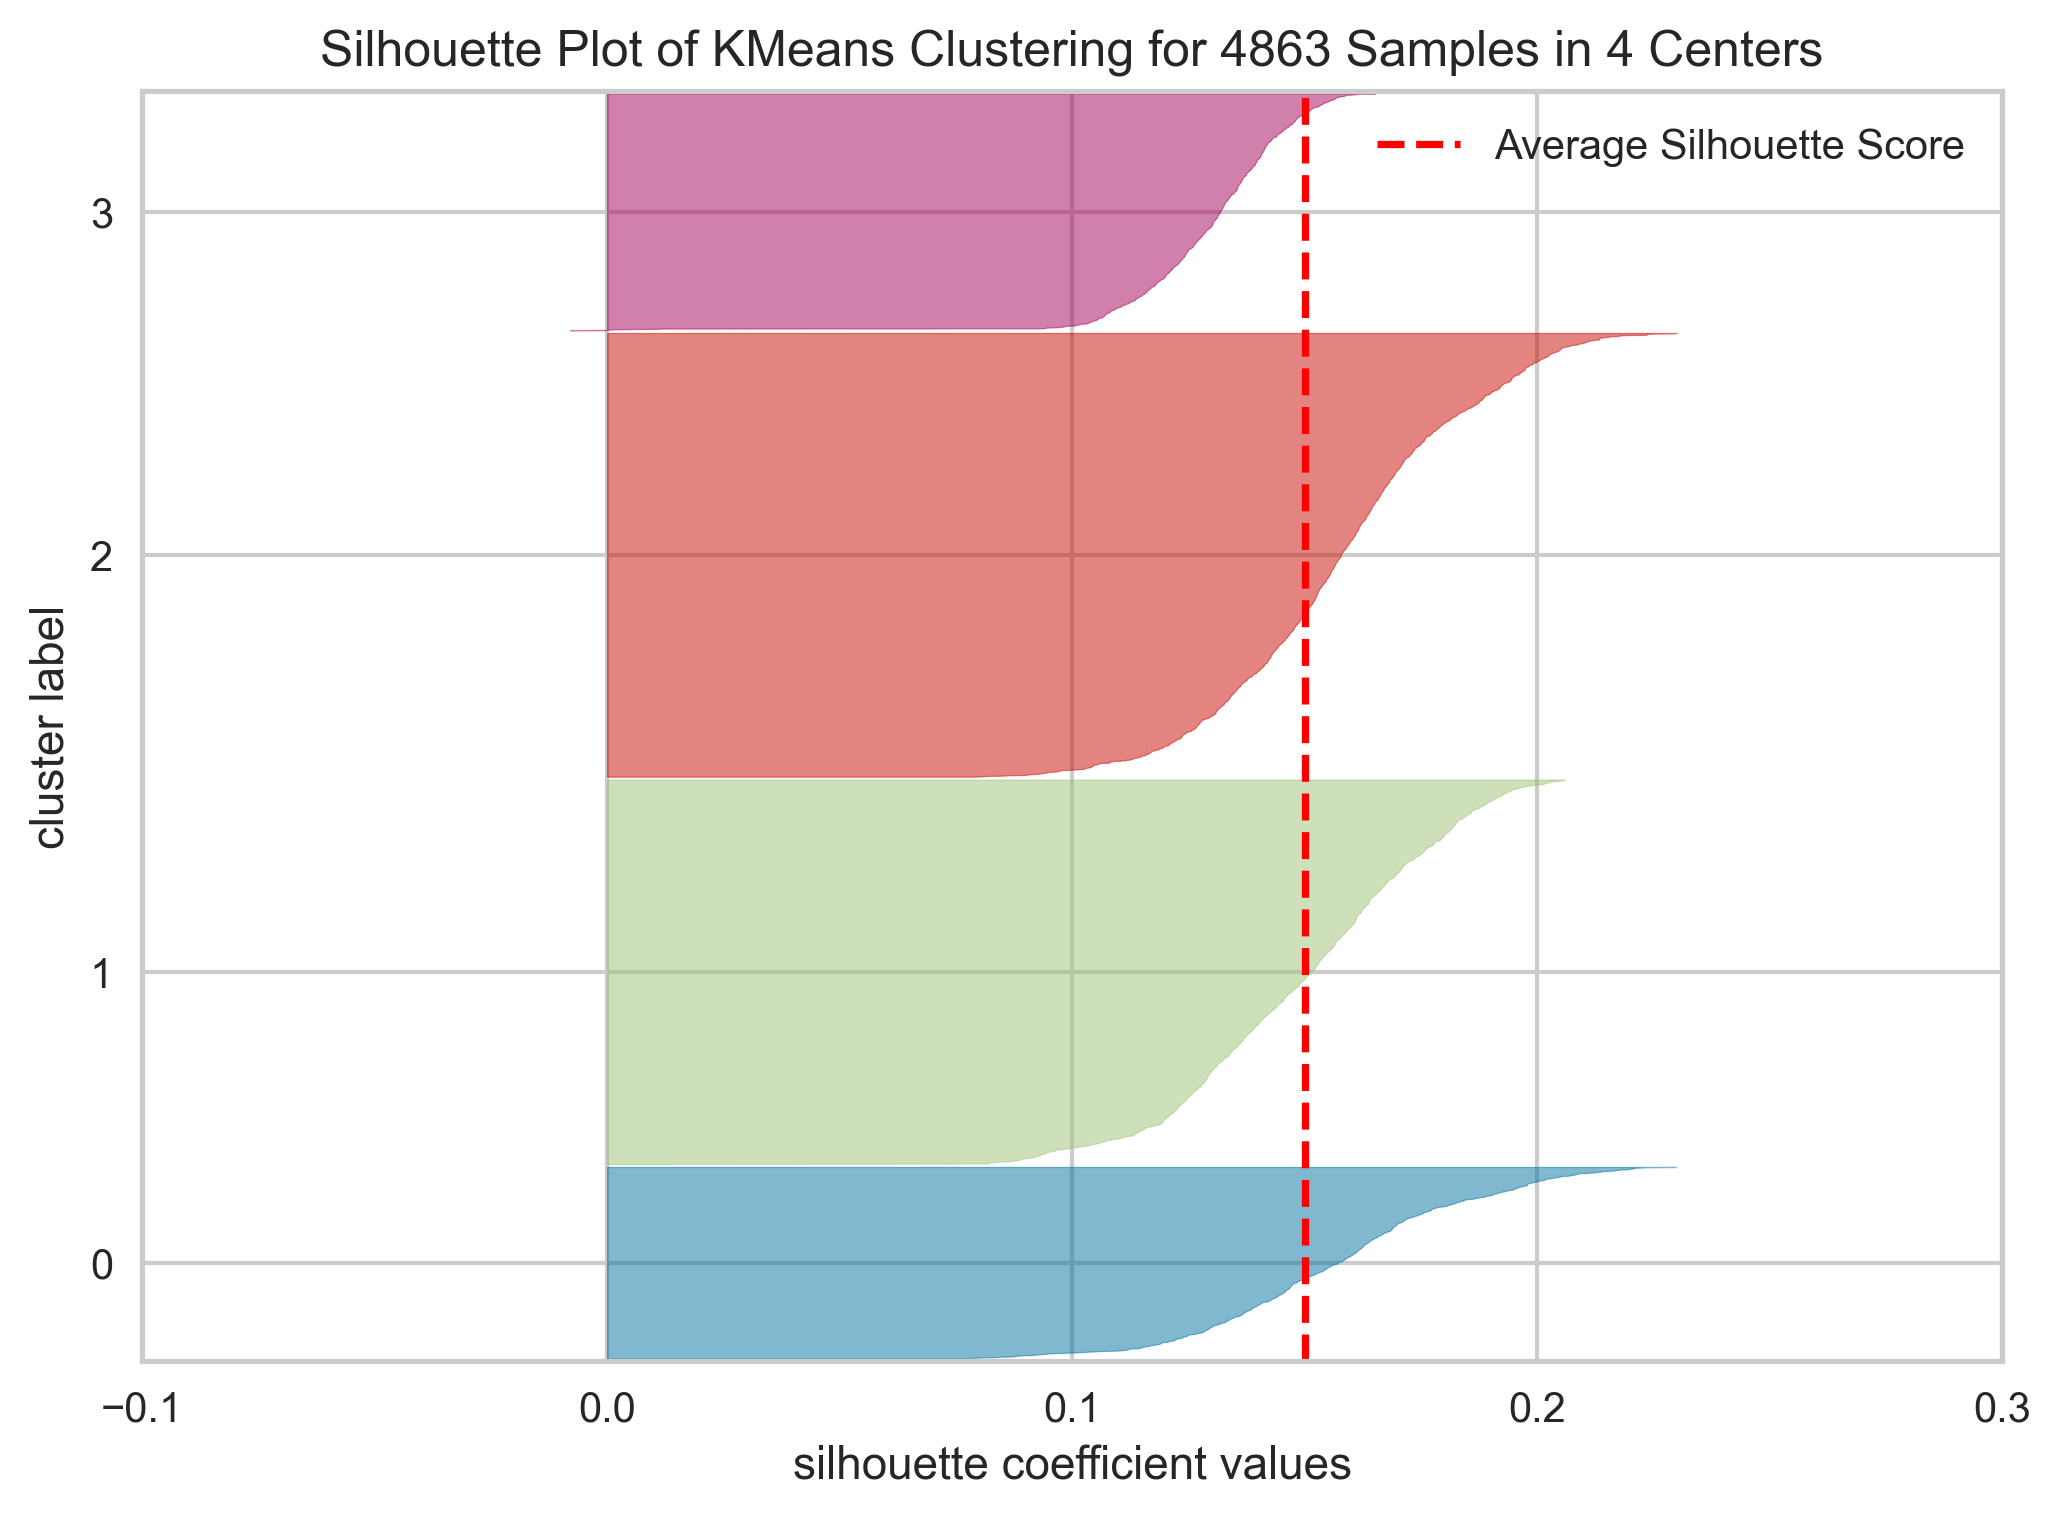

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4863 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4) ## 3으로 설정 
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_minmax)        # Fit the data to the visualizer

score = silhouette_score(df_minmax, model.labels_)
print(f'실루엣 스코어(1에 근접해야 좋음): {score}')
visualizer.show()        # Finalize and render the figure

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
# from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드


df = pd.read_csv("./data/Tourism_pre.CSV")



##########데이터 분석
##########데이터 전처리

# df.drop('CustomerID', axis=1,inplace=True)

# Gender변수 가변수 처리
df1 = pd.get_dummies(df, columns = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation'], drop_first=True)


# 데이터 정규화 적용
mm_scaler = MinMaxScaler()
minmax = mm_scaler.fit_transform(df1)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=minmax, columns=df1.columns)

##########모델 생성

model = KMeans(n_clusters=4) #알맞은 클러스터 갯수는?

##########모델 학습

model.fit(df_minmax)

##########모델 검증

print(f'inertia(작을수록) : {model.inertia_}') #78.94084142614601 #관성값: 샘플과 클러스터간 거리 제곱 합, 작을수록 좋음
print(f'silhouette_score(1에 가까울수록) : {silhouette_score(minmax, model.predict(minmax))}') ##0.5003019230876485 #실루엣 계수: 군집간 거리는 멀고 군집내 거리는 가까울수록 점수 높음 (0~1), 0.5 보다 크면 클러스터링이 잘 된거라 평가

##########모델 예측

print(model.labels_) #[1 1 1 2 2 1 0 0 0 2 0 1]

y_predict = model.predict(minmax)

inertia(작을수록) : 14791.441871067273
silhouette_score(1에 가까울수록) : 0.1500711648129037
[0 0 1 ... 2 1 1]


In [21]:
df1['Cluster'] = model.labels_

In [22]:
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(minmax, df1['Cluster'])
df1['silhouette_coeff'] = score_samples
df1.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_4,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,Designation_1,Designation_2,Designation_3,Designation_4,Cluster,silhouette_coeff
0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,1,0,0,1,0,0,0,0.094616
1,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,0,0,1,0,0,0,0.169072
2,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,1,0,1,0,0,0,1,0.141545
3,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,1,0,0,0,3,0.135698
4,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,0,0,0,1,0,0,0,1,0.175129


In [23]:
# 각 클러스터별 실루엣 계수 평균
df1.groupby("Cluster")['silhouette_coeff'].mean()

Cluster
0    0.158209
1    0.149733
2    0.156781
3    0.129932
Name: silhouette_coeff, dtype: float64

In [24]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=2)

df1['pca_x'] = transformer.fit_transform(minmax)[:,0]
df1['pca_y'] = transformer.fit_transform(minmax)[:,1]
df1.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,MaritalStatus_2,MaritalStatus_3,Designation_1,Designation_2,Designation_3,Designation_4,Cluster,silhouette_coeff,pca_x,pca_y
0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,...,1,0,0,1,0,0,0,0.094616,0.819046,0.247492
1,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,1,0,0,0,0.169072,0.774410,-1.054126
2,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,...,1,0,1,0,0,0,1,0.141545,-0.985780,-0.259681
3,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,1,0,0,0,3,0.135698,-0.802538,0.304208
4,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,0,1,0,0,0,1,0.175129,-0.632158,0.047837


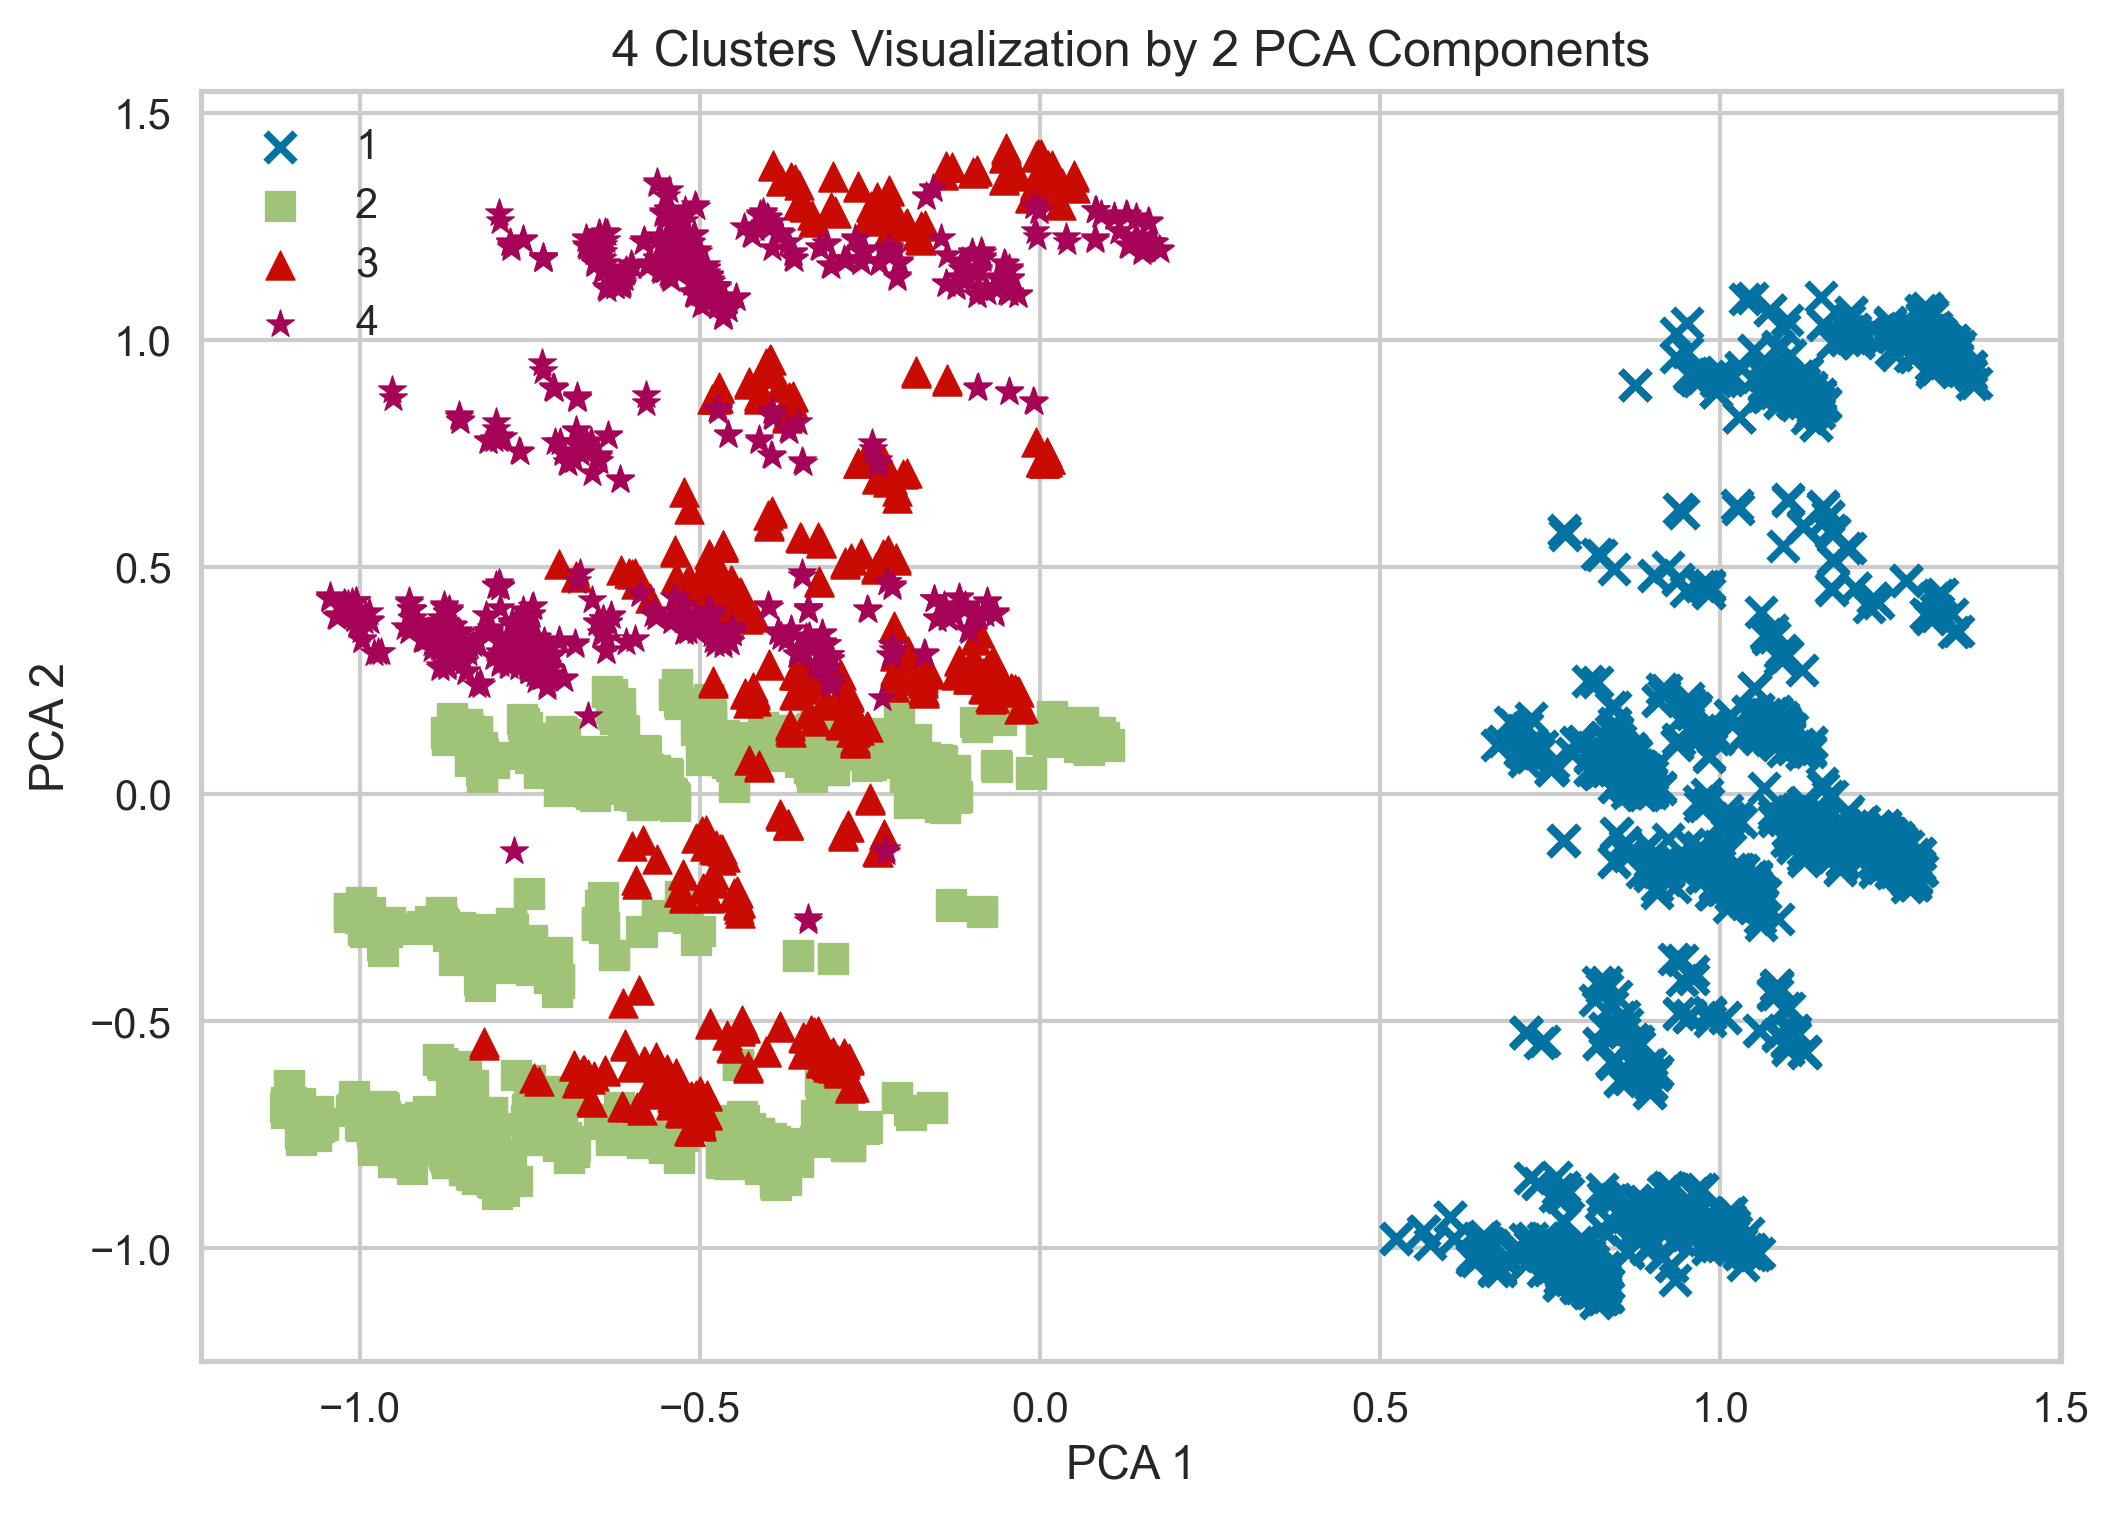

In [25]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df1[df1['Cluster']==0].index
marker1_ind = df1[df1['Cluster']==1].index
marker2_ind = df1[df1['Cluster']==2].index
marker3_ind = df1[df1['Cluster']==3].index

# cluster값 0, 1, 2,3에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. x, s, ^ 로 marker 표시
plt.scatter(x=df1.loc[marker0_ind,'pca_x'], y=df1.loc[marker0_ind,'pca_y'], marker='x', label='1') 
plt.scatter(x=df1.loc[marker1_ind,'pca_x'], y=df1.loc[marker1_ind,'pca_y'], marker='s',label='2')
plt.scatter(x=df1.loc[marker2_ind,'pca_x'], y=df1.loc[marker2_ind,'pca_y'], marker='^',label='3')
plt.scatter(x=df1.loc[marker3_ind,'pca_x'], y=df1.loc[marker3_ind,'pca_y'], marker='*',label='4')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.legend()
plt.show()